<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [76]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [15]:
n=len(df['species'].unique())
print("el numero de elementos de la columna species es:",n)


el numero de elementos de la columna species es: 11


In [77]:
df['species'].unique()
df['species']=df['species'].str.lower().str.strip()
df.loc[df['species']=='nan','species']='default'
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,virginica
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica
...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa
146,4.8,3.0,1.4,0.1,setosa
147,4.9,3.1,1.5,0.1,setosa
148,4.9,3.6,1.4,0.1,setosa


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

<AxesSubplot:>

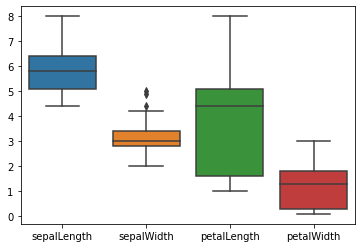

In [21]:
for i in df.columns:
    df.loc[df[i]=='nan',i]=0
    
dff=df.drop(['species'], axis=1)
sns.boxplot(data=dff)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [82]:
df['label']=''
for i in range(len(df)):
    if df['sepalLength'][i]<4.0 or df['sepalLength'][i]>7.0:
        df['label'][i] = "sepalLength"
    if df['sepalWidth'][i]<2.0 or df['sepalWidth'][i]>4.5:
        df['label'][i] = "sepalWidth"
    if df['petalLength'][i]<1.0 or df['petalLength'][i]>7.0:
        df['label'][i] = "petalLength"
    if df['petalWidth'][i]<0.1 or df['petalWidth'][i]>2.5:
        df['label'][i] = "petalWidth"
df
    

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,petalWidth
1,7.2,3.6,6.1,2.5,virginica,sepalLength
2,6.3,3.3,6.0,2.5,virginica,
3,6.7,3.3,5.7,2.5,virginica,
4,6.3,3.4,5.6,2.4,virginica,
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,
146,4.8,3.0,1.4,0.1,setosa,
147,4.9,3.1,1.5,0.1,setosa,
148,4.9,3.6,1.4,0.1,setosa,


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

<AxesSubplot:xlabel='sepalWidth', ylabel='petalWidth'>

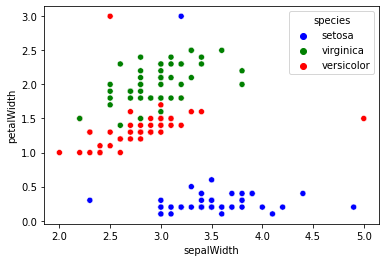

In [91]:

sns.scatterplot(
        x='sepalWidth',
        y='petalWidth',
        data=df,
        hue='species',
        palette = ['blue', 'green', 'red'])



<AxesSubplot:xlabel='sepalLength', ylabel='petalLength'>

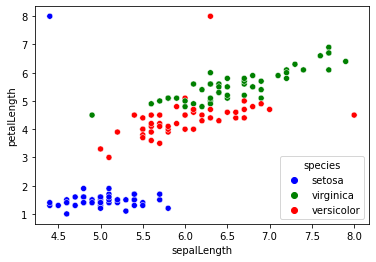

In [100]:

sns.scatterplot(
        x='sepalLength',
        y='petalLength',
        data=df,
        hue='species',
        palette = ['blue', 'green', 'red'])

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

In [97]:
mask_df=df['label']==''


df_filtrado=df[mask_df]
df_filtrado

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
2,6.3,3.3,6.0,2.5,virginica,
3,6.7,3.3,5.7,2.5,virginica,
4,6.3,3.4,5.6,2.4,virginica,
5,6.7,3.1,5.6,2.4,virginica,
6,5.8,2.8,5.1,2.4,virginica,
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,
146,4.8,3.0,1.4,0.1,setosa,
147,4.9,3.1,1.5,0.1,setosa,
148,4.9,3.6,1.4,0.1,setosa,


<AxesSubplot:xlabel='sepalLength', ylabel='petalLength'>

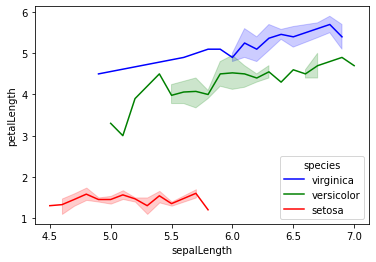

In [98]:
sns.lineplot(
        x='sepalLength',
        y='petalLength',
        data=df_filtrado,
        hue='species',
        palette = ['blue', 'green', 'red'])